# Single Substitution Simulation Run Trace

(c) 2020 Tom Röschinger. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

***

In [68]:
using LinearAlgebra, Jevo, Jedi, Plots, LambertW, Statistics
Jedi.default_gr!()

# Parameters
steps = 1* 10^8
rho = 0
l_0 = 15
N = 100
nu = 0
ϵ = 2
n = 4
emat = ϵ * (ones(4, 4) - Matrix{Float64}(I, 4, 4))
f0 = 300/2N

4×4 Array{Float64,2}:
 0.0  2.0  2.0  2.0
 2.0  0.0  2.0  2.0
 2.0  2.0  0.0  2.0
 2.0  2.0  2.0  0.0

In [69]:
l0_kappa(kappa, l) = 1/2 * lambertw(2 * ϵ^2 * N * l * f0 * (n-1)/n^2 * exp(10)/(1+kappa))
fl(l_opt) = l0_kappa(0, 10)/10^2 * n^2 / (n-1) * 1/ϵ
fl_new(l_opt) = l0_kappa(0, 10)^2 / l_opt^2 * n^2 / (n-1) * 1/2

F = Jevo.fermi_fitness(f0=f0, fl=fl_new(10)/2N, epsilon=ϵ)

Jevo.fermi_fitness(10, 1.0, 2.0, 1.5, 0.007509974109133673, Jevo.Est)

In [84]:
rho=0
pop = Jevo.mono_pop(N=100, l=l_0)
Jevo.initiate!(pop, emat)
t0 = zeros(2, steps)
for i in 1:steps
    Jevo.bp_substitution!(pop, emat, F)
    if rand() < rho/N
        Jevo.driver_mutation!(pop)
    end
    if rand() < 1/N^2
        Jevo.l_substitution!(pop, emat, F)
    end
    # Recover lost sites
    if length(pop.seqs) < 7
        Jevo.initiate!(pop, emat)
    end
    t0[:, i] = [Jevo.get_energy(pop, emat), length(pop.seqs)] 
end
#=
rho=1
pop = Jevo.mono_pop(N=100, l=l_0)
Jevo.initiate!(pop, emat)
t1 = zeros(2, steps)
for i in 1:steps
    Jevo.bp_substitution!(pop, emat, F)
    if rand() < rho/N
        Jevo.driver_mutation!(pop)
    end
    if rand() < nu
        Jevo.l_substitution!(pop, emat, F)
    end
    # Recover lost sites
    if length(pop.seqs) < 7
        Jevo.initiate!(pop, emat)
    end
    t1[:, i] = [Jevo.get_energy(pop, emat), length(pop.seqs)] 
end
=#
rho=10
pop = Jevo.mono_pop(N=100, l=l_0)
Jevo.initiate!(pop, emat)
t5 = zeros(2, steps)
for i in 1:steps
    Jevo.bp_substitution!(pop, emat, F)
    if rand() < rho/N
        Jevo.driver_mutation!(pop)
    end
    if rand() < rho/N^2
        Jevo.l_substitution!(pop, emat, F)
    end
    # Recover lost sites
    if length(pop.seqs) < 7
        Jevo.initiate!(pop, emat)
    end
    t5[:, i] = [Jevo.get_energy(pop, emat), length(pop.seqs)] 
end


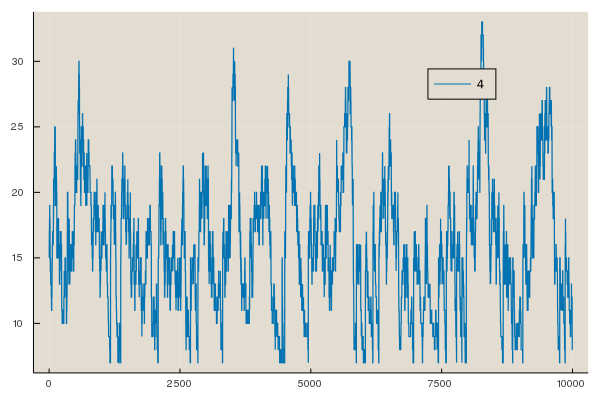

In [89]:
#plot(t5[1, 10000:100000], label=0)
#plot!(t1[2, 1:150:end], label=1)
plot(t5[2, 1:10000:end], label=4)

In [90]:
mean(t5[2, :])

15.83577291

In [91]:
mean(t0[2, 100000:end])

12.698720433446242